<a href="https://colab.research.google.com/github/SwathiAenugu/Fundamentals-of-Artificial-Intelligence/blob/main/AI_Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Assuming that there are 3 m&m candy bottles (labeled B1, B2, B3) with red, green and yellow colors, one of the candies from 3 bottles will be randomly taken out in a series. Given the transition probability matrix A, emission probability B and initial probability π as follows, if observation sequence is red-red-yellow-green-yellow, write python program by the functions from "hmmlearn" model to find probability of observation sequence P(rrygy), and what most likely bottles in series they are coming from.**

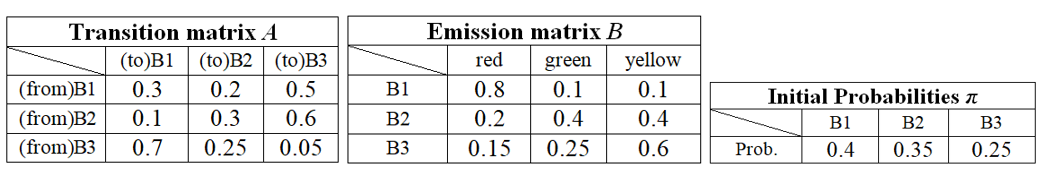

In [6]:
!pip install hmmlearn
"""
    Given observations, find hidden state sequence by viterbi algorithm
"""
import numpy as np
from hmmlearn import hmm

label = ["B1", "B2", "B3"]
n_label = len(label)   # length of label =3

color = ["red", "green","yellow"]
n_color = len(color)

initial_probability = np.array([0.4, 0.35, 0.25])

trans = np.array([
  [0.3, 0.2, 0.5],
  [0.1, 0.3, 0.6],
  [0.7, 0.25, 0.05]
])

emission = np.array([
  [0.8, 0.1, 0.1],
  [0.2, 0.4, 0.4],
  [0.15, 0.25, 0.6]
])
print('\nTraining the Hidden Markov Model...\n')
model = hmm.MultinomialHMM(n_components=n_label) 


model.startprob_=initial_probability
model.transmat_=trans
model.emissionprob_=emission

seen = np.array([[0,0,2,1,2]]).T        # 0: red;     1: green   2: yellow => rrygy
logprob, box = model.decode(seen, algorithm="viterbi")
seen = [0,0,2,1,2]

"""
    Or find label sequence by "predict" function 
"""
seen = np.array([[0,0,2,1,2]]).T 
box2 = model.predict(seen)      
seen = [0,0,2,1,2]
print("\nThe color sequence given is:", ", ".join(map(lambda x: color[x], seen)))
print("\nThe labelled bottle sequence it is coming from :", ", ".join(map(lambda x: label[x], box2)))
"""
    Find probability of color sequence
"""
seen = np.array([[0,0,2,1,2]]).T                 # P(rrygy) 
print("\nProbability of color sequence P(rrygy)= ",model.score(seen))     


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Training the Hidden Markov Model...


The color sequence given is: red, red, yellow, green, yellow

The labelled bottle sequence it is coming from : B1, B1, B3, B2, B3

Probability of color sequence P(rrygy)=  -5.342304036552551


# **2.Suppose there are only two average annual temperatures, "Hot" and "Cold" in Fremont city of California, and also suppose that current observation in Mission San Jose district indicates a correlation between the tree size of palm, small(s)/medium(m) /large(l) and temperature, as follows are the transition matrix A, emission matrix B, and initial probabilities π.**

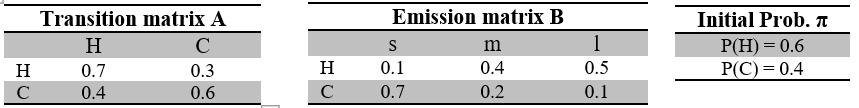

**(a)	Find the probability of tree size sequence "small", "medium", "small", "large" from temperature sequence "Hot", "Hot", "Cold", and "Cold" in Markov Chain. P(smsl HHCC)=?**


In [22]:
!pip install hmmlearn
"""
    Given observations, find hidden state sequence by viterbi algorithm
"""
import numpy as np
from hmmlearn import hmm
label = ["H", "C"]
n_label = len(label)   # length of label =2
temp = ["small", "medium","large"]
n_temp = len(temp)
initial_probability = np.array([0.6,0.4])

trans = np.array([
  [0.7,0.3],
  [0.4,0.6]
])

emission = np.array([
  [0.1,0.4,0.5],
  [0.7,0.2,0.1]
])
print('\nTraining the Hidden Markov Model...\n')
model = hmm.MultinomialHMM(n_components=n_label) 


model.startprob_=initial_probability
model.transmat_=trans
model.emissionprob_=emission

seen = np.array([[0,1,0,2]]).T        # 0: small;     1: medium   2: large => smsl
logprob, box = model.decode(seen, algorithm="viterbi")
# seen = [0,1,0,2]

"""
    Or find label sequence by "predict" function 
"""
seen = np.array([[0,1,0,2]]).T   
seen = [0,1,0,2]
print("\nThe temperature sequence given is:", ", ".join(map(lambda x: temp[x], seen)))
seen=np.array([[2,2,0,0]]).T
box2 = model.predict(seen)  
print("\nThe labelled sequence it is coming from :", ", ".join(map(lambda x: label[x], box2)))
"""
    Find probability of color sequence
"""
seen = np.array([[0,1,0,2]]).T                 # P(smsl) 
print("\nProbability of temperature sequence P(rrygy)= ",model.score(seen))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Training the Hidden Markov Model...


The temperature sequence given is: small, medium, small, large

The labelled sequence it is coming from : H, H, C, C

Probability of temperature sequence P(rrygy)=  -4.642913590898749


**(b) Calculate α_2 (1)  and α_2 (2) in forward algorithm**

In [28]:
import pandas as pd
import numpy as np

V = np.array([0, 1, 1, 2, 0, 1, 2, 0, 1, 0, 2]) 

# Transition Probabilities
a = np.array(((0.7, 0.3), (0.4, 0.6)))

# Emission Probabilities
b = np.array(((0.1, 0.4, 0.5), (0.7, 0.2, 0.1))) 

# the initial probabilities
pi = np.array((0.6, 0.4))

def forward(V, a, b, pi):
    p = 1
    alpha = np.zeros((V.shape[0], a.shape[0]))
    alpha[0, :] = pi * b[:, V[0]]

    for t in range(1, V.shape[0]):
        probability_of_observation = 0 
        for j in range(a.shape[0]):
            alpha[t, j] = alpha[t - 1].dot(a[:, j]) * b[j, V[t]]
            probability_of_observation += alpha[t, j]  
        p = p * probability_of_observation 

    return p 

forward(V, a, b, pi) 

2.642102310184481e-33